# Code for preprocessing the data for training a Classifier

###### Note : following code is an example for preprocessing the data for a classifier
###### this code is based on left shoulder and elbow coordinates

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading Data

In [2]:
df = pd.read_csv('../data/data.csv')
df.head()

,0_x,0_y,0_z,0_vis,1_x,1_y,1_z,1_vis,2_x,2_y,...,30_z,30_vis,31_x,31_y,31_z,31_vis,32_x,32_y,32_z,32_vis
0,-0.513346,-0.486864,0.978329,1.0,-0.537284,-0.468331,0.907438,1.0,-0.551415,-0.468160,...,-0.712293,0.004528,-0.563900,-1.402235,-0.169188,0.001297,-0.414179,-1.400190,-0.236010,0.001425
1,-0.516051,-0.487786,0.801669,1.0,-0.540958,-0.469537,0.745705,1.0,-0.554932,-0.469614,...,-0.586721,0.003706,-0.546744,-1.396654,-0.105789,0.000889,-0.416563,-1.392031,-0.177770,0.000804
2,-0.517325,-0.486723,0.786777,1.0,-0.542302,-0.468774,0.730178,1.0,-0.556188,-0.468928,...,-0.572160,0.004798,-0.549911,-1.392735,-0.099640,0.001099,-0.424577,-1.388623,-0.168463,0.000999
3,-0.517781,-0.486719,0.770728,1.0,-0.542295,-0.468731,0.714361,1.0,-0.556079,-0.468834,...,-0.563850,0.004306,-0.552028,-1.392125,-0.066083,0.000939,-0.423960,-1.386563,-0.159205,0.000809
4,-0.519239,-0.487284,0.833225,1.0,-0.543011,-0.469002,0.772886,1.0,-0.556789,-0.469014,...,-0.574910,0.003707,-0.566962,-1.390860,-0.077285,0.000848,-0.432768,-1.386580,-0.154454,0.000748


In [3]:
#collecting metadata
data = df[['11_x', '11_y', '13_x', '13_y']]

In [4]:
#renaming columns
data.columns = ['left_shoulder_X', 'left_shoulder_Y',
                'left_elbow_X', 'left_elbow_Y']

In [5]:
#useful metadata
data.head()

,left_shoulder_X,left_shoulder_Y,left_elbow_X,left_elbow_Y
0,-0.701167,-0.579701,-0.946057,-0.599737
1,-0.703238,-0.579433,-0.941791,-0.608207
2,-0.700262,-0.579484,-0.940807,-0.608857
3,-0.699332,-0.578418,-0.936533,-0.613209
4,-0.701886,-0.577890,-0.936760,-0.610650


### Preprocess

In [6]:
#getting the values
x1 = data['left_elbow_X']
y1 = data['left_elbow_Y']
x2 = data['left_shoulder_X']
y2 = data['left_shoulder_Y']

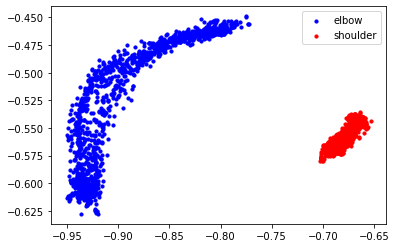

In [7]:
#displaying raw metadata
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x1, y1, s = 10, c = 'b', label = 'elbow')
ax1.scatter(x2, y2, s = 10, c = 'r', label = 'shoulder')
plt.legend(loc='upper right');
plt.show()

In [8]:
#calculating mean of the shoulder, cause its the origin in this scenario
dx = x2.mean()
dy = y2.mean()

In [17]:
#some important functions


#slope formula
def slope(x1, y1, x2, y2):
    return (y2 - y1) / (x2 - x1)

#rounding off the values for elbow coordinates into an arc
def roundoff(x1, y1, x2, y2):
    s = slope(x1, y1, x2, y2)
    d = 1
    x = d * ((d**2) / (1+s**2))**0.5
    y = s*x
    return -round(x, 3), -round(y, 3)

In [10]:
#rounded-off data
a, b = roundoff(x2, y2, x1, y1)

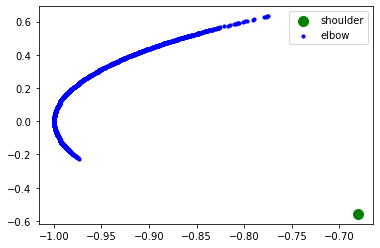

In [11]:
#displaying rounded data
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(dx, dy, s = 100, c = 'green', label = 'shoulder')
ax1.scatter(a, b, s = 10, c = 'b', label = 'elbow')
plt.legend(loc='upper right');
plt.show()

#### Generating Fake Data

In [12]:
fakex = []
fakey = []
def roundoff_fake():
    for i in np.arange(-0.600, 1.000, 0.001):
        for j in np.arange(-1.000, 1.000, 0.001):
            if float("{0:.3}".format(i**2 + j**2)) == 1 :
                fakex.append(i)
                fakey.append(j)
roundoff_fake()

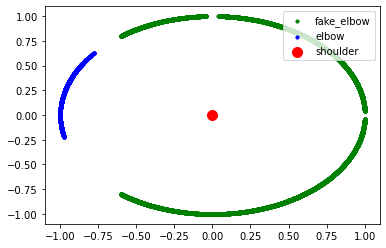

In [13]:
#displaying fake rounded data
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(fakex, fakey, s = 10, c = 'green', label = 'fake_elbow')
ax1.scatter(a, b, s = 10, c = 'b', label = 'elbow')
ax1.scatter(0, 0, s = 100, c = 'red', label = 'shoulder')
plt.legend(loc='upper right');
plt.show()

#### Converting to a DataFrame

In [14]:
x = []
y = []
z = []

x.extend(a)
y.extend(b)
z1 = [1]*len(x)
z.extend(z1)

x.extend(fakex)
y.extend(fakey)
z2 = [0]*len(fakex)
z.extend(z2)

final_data = pd.DataFrame({'x': x,'y': y, 'z': z})

In [18]:
final_data.head()

,x,y,z
0,-0.997,-0.082,1
1,-0.993,-0.120,1
2,-0.993,-0.121,1
3,-0.989,-0.145,1
4,-0.990,-0.138,1


### Reference for Training a Classifier

In [19]:
x= final_data.iloc[:, :2].values
y= final_data.iloc[:, 2].values